# Loading data
Load businesses, users and reviews

In [1]:
import pandas as pd
import json
import os
def load_jsons(data_path, file):
    """ helper function to load '.json' files (they're not proper jsons) """
    file_path = data_path + file
    with open(file_path) as jsons:
        lines = [json.loads(json_line) for json_line in jsons]
    return pd.DataFrame(lines)

# Create a tuple of the address of the business files E.g. ('./yelp/data/110 las vegas', 'business.json')
# AllBusinessFilePaths=[(subdir,file) for subdir, dirs, files in os.walk('./yelp/data/') for file in files if file == 'business.json']
# AllUserFilePaths=[(subdir,file) for subdir, dirs, files in os.walk('./yelp/data/') for file in files if file == 'user.json']
# AllReviewFilePaths=[(subdir,file) for subdir, dirs, files in os.walk('./yelp/data/') for file in files if file == 'review.json']

AllBusinessFilePaths = [('./yelp/data/cleveland', 'business.json')]
AllUserFilePaths = [('./yelp/data/cleveland', 'user.json')]
AllReviewFilePaths = [('./yelp/data/cleveland', 'review.json')]

# Merge the dataframes of these files and reset the index
AllBusinessMerged=pd.concat([load_jsons(x[0]+'/',x[1]) for x in AllBusinessFilePaths]).reset_index(drop=True)
AllUserMerged=pd.concat([load_jsons(x[0]+'/',x[1]) for x in AllUserFilePaths]).reset_index(drop=True)
AllReviewMerged=pd.concat([load_jsons(x[0]+'/',x[1]) for x in AllReviewFilePaths]).reset_index(drop=True)


In [2]:
AllBusinessMerged.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,YNvZdMLXa4q8e9tiE4ge4A,Louis Stokes Cleveland VA Medical Center,10701 E Blvd,Cleveland,OH,44106,41.513554,-81.613752,3.5,11,1,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Health & Medical, Medical Centers",None
1,OwXMxqxIy4YoprAjnoUoiA,B & M Bar-B-Que Shaw,12700 Shaw Ave,Cleveland,OH,44108,41.540890,-81.595327,3.5,4,1,"{'GoodForKids': 'False', 'RestaurantsReservati...","Barbeque, Restaurants",None
2,3e0IGa_-zqTemKLc1dbdmg,Phusion Cafe,11611 Euclid Ave,Cleveland,OH,44106,41.510985,-81.603050,3.5,17,1,"{'OutdoorSeating': 'False', 'WiFi': ''no'', 'G...","Restaurants, Taiwanese","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,_RTnzQumsGrs3n4XuJaDQg,Scorchers,1701 E 12th St,Cleveland,OH,44114,41.502996,-81.685414,3.0,6,0,"{'RestaurantsPriceRange2': '1', 'OutdoorSeatin...","Nightlife, Bars, Sports Bars",None
4,x5mv33siyWGXVpOmLACfPQ,Brook Park Laser Wash,5673 Smith Rd,Cleveland,OH,44142,41.409087,-81.803309,1.5,5,1,None,"Automotive, Car Wash",None


In [3]:
AllUserMerged.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,...,0,0,0,0,1,1,1,1,2,0
1,AWCY8laHjH0-3HMT0LGpUA,Jin,732,2010-07-09 15:53:01,1104,417,586,"2011,2012,2013,2014,2015,2016","Xqo1ru1F7srvbUJaCNHkvQ, v5LvxWrscDM7XKpD6f0WxQ...",71,...,8,11,18,8,83,196,185,185,56,42
2,t-nB38eHbeFuabXBdJMwvg,Katharine,412,2008-06-13 14:48:51,1816,463,1341,"2011,2012,2013,2014,2015,2016,2017,2018","2Y1pwMu2pZJDGQ7moD-2gQ, Qlys2g0R3PfNAuMOhagwLA...",77,...,3,4,1,1,60,64,140,140,120,65
3,d7D4dYzF6THtOx9imf-wPw,Regina,1053,2008-12-05 07:16:22,11769,6997,9594,"2013,2014,2015,2016,2017,2018","SxSeTYznS0YKSISgs5hj_Q, VtnCudEFLBjnxblLUAPYhA...",231,...,46,29,9,5,419,611,822,822,475,338
4,LQbuEFUxqB0Ekt7Ps9ZnJA,Shelby,98,2012-02-26 18:43:59,115,22,21,,"AS2i47y2v1AXz22nrfeJow, Mw0GPZTiVfE9eS0Db-xDaQ...",1,...,0,0,0,0,0,1,0,0,0,0


In [4]:
AllReviewMerged.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,qrffudO73zsslZbe8B9D3Q,sG_h0dIzTKWa3Q6fmb4u-g,b2jN2mm9Wf3RcrZCgfo1cg,2.0,1,0,0,I was really looking forward to visiting after...,2015-01-18 14:04:18
1,36xxeOr4m4UlRf9FM1HzdA,liUNZm0tOJJ-d-pFCdqu9A,ZNB91myFoOYgyXoG5LQeGQ,1.0,1,0,0,I took my wife out for a Birthday dinner with ...,2014-12-17 19:34:47
2,4PKiLkFTff9HK44QkOo6vA,vDlrf84X8yu-CZ-8isrOSw,anzCdD5eIEHwydTpXhLlUA,4.0,0,0,1,Heard about this place and was dying to check ...,2015-01-03 20:45:05
3,ydehlths0Zpg2gbXPOs6Qw,wUAQq8gZ9tpWpMDPNTB6TA,CtYWpX_cy1YdZgoKtS0Tqg,1.0,1,0,0,Also don't believe when they say they will giv...,2015-03-04 19:46:32
4,a_g4eysuYC1pI9tv3MCZxA,QaN-nccbLZPWzownQYgTVQ,LzWROAt-RhgaBss4cOoDRQ,4.0,11,3,4,I love the West Side Market but I can't stand ...,2013-08-03 15:06:21


# Data wrangling
Let's get the data to a usable form

## Selection
Select only the data we actually need

In [5]:
businesses = AllBusinessMerged[['business_id', 'name', 'city', 'stars', 'attributes', 'categories']]
businesses = businesses.astype({'business_id': str})
businesses = businesses.rename(columns = {'stars': 'business_stars', 'name': 'business_name'})

In [6]:
users = AllUserMerged[['user_id', 'name', 'friends']]
users = users.astype({'user_id': str})
users = users.rename(columns = {'name': 'user_name'})

In [7]:
reviews = AllReviewMerged[['user_id', 'business_id', 'stars']]
reviews = reviews.astype({'user_id': str, 'business_id': str})
reviews = reviews.rename(columns = {'stars': 'review_stars'})

# Create helper functions

In [8]:
def add_classifications(data, treshold):
    output = data
    output['classification'] = output['review_stars'] >= treshold
    return output
    

In [9]:
def categories_to_list(categories):
    if categories == None:
        return {}
    
    categories_list =  list(categories.split(','))
    return {category.strip() : 1 for category in categories_list}
    

In [10]:
def attributes_to_list(attributes):
    if attributes == None:
        return {}
    
    return attributes
    

# Algorithm time!

In [11]:
# correctly encode the categories
businesses.loc[:,'categories'] = businesses.loc[:,'categories'].apply(categories_to_list)
business_categories = pd.DataFrame(businesses.categories.tolist())
business_categories = business_categories.fillna(0)
business_categories = business_categories.astype(bool)
businesses_category_encoded = businesses.join(business_categories).drop(columns = ['categories'])

In [12]:
# correctly encode other attributes
businesses.loc[:,'attributes'] = businesses.loc[:,'attributes'].apply(attributes_to_list)
business_attributes = pd.DataFrame(businesses.attributes.tolist())
business_attributes = business_attributes[['BikeParking', 'GoodForKids', 'BusinessAcceptsCreditCards']]
business_attributes = business_attributes.fillna(False)

business_attributes = business_attributes.replace({1: True, 0: False, 1.0: True, 0.0: False, 'True': True, 'False': False, 'None': 0})

businesses_encoded = businesses_category_encoded.join(business_attributes).drop(columns = ['attributes'])

In [13]:
from sklearn import svm
from numpy import nan

def recommend(pairs, businesses, train_reviews, treshold, gamma, kernel, nu):
    users = set(pairs['user_id'])
    
    # merge business data onto the provided pairs and delete useless variables
    predict_pairs = pairs[['user_id', 'business_id']]
    predict_pairs = predict_pairs.merge(businesses, on='business_id').set_index(pairs.index)
    predict_pairs = predict_pairs.drop(columns = ['business_id', 'business_name', 'city'])
    
    # initialize a DataFrame to eventually fill with results
    result_pairs = pairs.copy()
    result_pairs['prediction'] = nan
    
    # run the process for each user individually
    for user in users:
        # prepare the training data
        user_train_reviews = train_reviews[train_reviews.user_id == user]
        user_train = user_train_reviews.merge(businesses, on='business_id')
        user_train = add_classifications(user_train, treshold)
        user_train = user_train.drop(columns = ['business_id', 'business_name', 'city', 'user_id', 'review_stars'])
        
        # determine whether to use positive or negative examples
        positive = user_train[user_train.classification == True]['classification'].count() > user_train[user_train.classification == False]['classification'].count()
        
        # remove classifications from the training data
        user_train_x = user_train[user_train.classification == positive].drop(columns = ['classification'])
        
        # catch situations where there are no reviews
        if len(user_train_x) > 0:   
            # train the SVM
            new_svm = svm.OneClassSVM(gamma = gamma, kernel = kernel, nu = nu)
            new_svm.fit(user_train_x)
        
        # get the right results table
        user_predict_pairs = predict_pairs[predict_pairs.user_id == user]
        user_predict_pairs = user_predict_pairs.drop(columns = ['user_id'])
        
        # catch situations where there are no reviews
        if len(user_train_x) > 0:
            # predict each pair this user is involved with using the SVM
            user_predict_pairs['prediction'] = new_svm.predict(user_predict_pairs)
        else:
            user_predict_pairs['prediction'] = -1.0 if positive else 1.0
        
        # determine the actual result based on whether positive or negative examples were used
        if positive:
            user_predict_pairs['prediction'] = user_predict_pairs.prediction == -1.0
        else:
            user_predict_pairs['prediction'] = user_predict_pairs.prediction == 1.0
        
        # add the results into the final table
        result_pairs['prediction'] = result_pairs['prediction'].fillna(user_predict_pairs['prediction'])

    return result_pairs
    

In [74]:
# split train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(reviews, test_size=0.1)

# add classifications
test = add_classifications(test, 3.75).drop(columns = ['review_stars'])

# this warning is just stuck here somehow... the code does work properly though, so eh.


<ipython-input-8-4127792a888e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['classification'] = output['review_stars'] >= treshold


In [15]:
recommendations = recommend(test, businesses_encoded, train, 3.5, 0.000001, 'rbf', 0.2)

In [16]:
from sklearn.metrics import precision_score, accuracy_score, recall_score

print('Precision:', precision_score(recommendations['classification'], recommendations['prediction']))
print('Accuracy:', accuracy_score(recommendations['classification'], recommendations['prediction']))
print('Recall:', recall_score(recommendations['classification'], recommendations['prediction']))


Precision: 0.6747406918880029
Accuracy: 0.5815996503496503
Recall: 0.7306843267108167


In [16]:
import random

random_predictions = test.copy()
random_predictions['prediction'] = nan
random_predictions['prediction'] = random_predictions['prediction'].apply(lambda _ : random.choice([True, False]))

print('Precision:', precision_score(random_predictions['classification'], random_predictions['prediction']))
print('Accuracy:', accuracy_score(random_predictions['classification'], random_predictions['prediction']))
print('Recall:', recall_score(random_predictions['classification'], random_predictions['prediction']))

NameError: name 'precision_score' is not defined

# Precision-recall curves

kernel linear running
current threshold 2.5
current threshold 3.0
current threshold 3.5
current threshold 4.0
current threshold 4.5
kernel poly running
current threshold 2.5
current threshold 3.0
current threshold 3.5
current threshold 4.0
current threshold 4.5
kernel rbf running
current threshold 2.5
current threshold 3.0
current threshold 3.5
current threshold 4.0
current threshold 4.5
kernel sigmoid running
current threshold 2.5
current threshold 3.0
current threshold 3.5
current threshold 4.0
current threshold 4.5


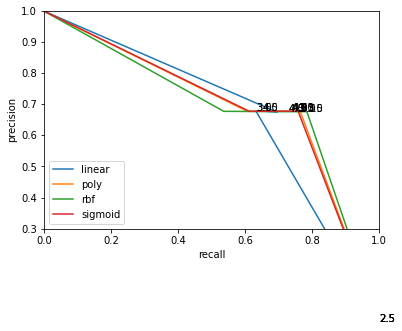

In [36]:
from sklearn.metrics import precision_score, accuracy_score, recall_score
import matplotlib.pyplot as plt

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    thresholds = [2.5, 3.0, 3.5, 4.0, 4.5]
    precisions = []
    recalls = []
    print('kernel', kernel, 'running')
    precisions.append(0)
    recalls.append(1)
    for threshold in thresholds:
        print('current threshold', threshold)
        preds = recommend(test, businesses_encoded, train, threshold, 0.000001, kernel, 0.2)
        precisions.append(precision_score(preds['classification'], preds['prediction']))
        recalls.append(recall_score(preds['classification'], preds['prediction']))
        
    precisions.append(1)
    recalls.append(0)
    thresholds = [0] + thresholds + [5]

    plt.plot(recalls, precisions)
    for r, p, t in zip(recalls, precisions, tresholds):
        plt.text(r, p, t)


plt.xlim(0.0, 1.0)
plt.ylim(0.3, 1.0)
plt.xlabel('recall')
plt.ylabel('precision')

plt.legend(kernels, loc = 'lower left')



current threshold 2.5
current threshold 3.0
current threshold 3.5
current threshold 4.0
current threshold 4.5


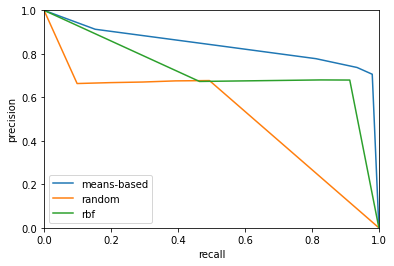

In [85]:
import numpy as np
means_test = test.copy()
means_test['predicted_rating'] = means_test['business_id']
means_test['predicted_rating'] = means_test['predicted_rating'].apply(lambda x : train[train.business_id == x]['review_stars'].mean())

thresholds = [2.5, 3.0, 3.5, 4.0, 4.5]
precisions = []
recalls = []

precisions.append(0)
recalls.append(1)

for threshold in thresholds:
    means_test['prediction'] = means_test['predicted_rating'] > threshold
    
    precisions.append(precision_score(means_test['classification'], means_test['prediction']))
    recalls.append(recall_score(means_test['classification'], means_test['prediction']))
        
precisions.append(1)
recalls.append(0)
thresholds = [0] + thresholds + [5]

plt.plot(recalls, precisions)


random_test = test.copy()
random_test['predicted_rating'] = nan
random_test['predicted_rating'] = random_test['predicted_rating'].apply(lambda _ : np.random.uniform(0,5))

thresholds = [2.5, 3.0, 3.5, 4.0, 4.5]
precisions = []
recalls = []

precisions.append(0)
recalls.append(1)

for threshold in thresholds:
    random_test['prediction'] = random_test['predicted_rating'] > threshold
    
    precisions.append(precision_score(random_test['classification'], random_test['prediction']))
    recalls.append(recall_score(random_test['classification'], random_test['prediction']))
        
precisions.append(1)
recalls.append(0)
thresholds = [0] + thresholds + [5]

plt.plot(recalls, precisions)


thresholds = [2.5, 3.0, 3.5, 4.0, 4.5]
precisions = []
recalls = []
precisions.append(0)
recalls.append(1)

for threshold in thresholds:
    print('current threshold', threshold)
    preds = recommend(test, businesses_encoded, train, threshold, 0.0000000001, 'rbf', 0.2)
    precisions.append(precision_score(preds['classification'], preds['prediction']))
    recalls.append(recall_score(preds['classification'], preds['prediction']))
        
precisions.append(1)
recalls.append(0)
thresholds = [0] + thresholds + [5]

plt.plot(recalls, precisions)

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.xlabel('recall')
plt.ylabel('precision')

plt.legend(['means-based', 'random', 'rbf'], loc = 'lower left')

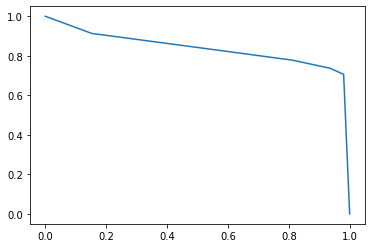

nu 0.2 running
current threshold 2.5
current threshold 3.0
current threshold 3.5
current threshold 4.0
current threshold 4.5
nu 0.4 running
current threshold 2.5
current threshold 3.0
current threshold 3.5
current threshold 4.0
current threshold 4.5
nu 0.6 running
current threshold 2.5
current threshold 3.0
current threshold 3.5
current threshold 4.0
current threshold 4.5
nu 0.8 running
current threshold 2.5
current threshold 3.0
current threshold 3.5
current threshold 4.0
current threshold 4.5


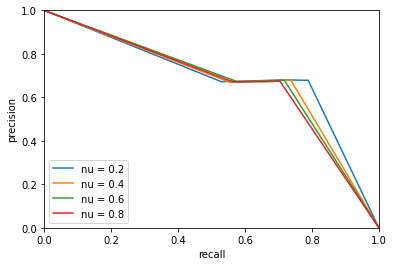

In [80]:
nu_values = [0.2, 0.4, 0.6, 0.8]

for nu in nu_values:
    thresholds = [2.5, 3.0, 3.5, 4.0, 4.5]
    precisions = []
    recalls = []
    print('nu', nu, 'running')
    precisions.append(0)
    recalls.append(1)
    for threshold in thresholds:
        print('current threshold', threshold)
        preds = recommend(test, businesses_encoded, train, threshold, 0.000001, 'rbf', nu)
        precisions.append(precision_score(preds['classification'], preds['prediction']))
        recalls.append(recall_score(preds['classification'], preds['prediction']))
        
    precisions.append(1)
    recalls.append(0)
    thresholds = [0] + thresholds + [5]

    plt.plot(recalls, precisions)

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.xlabel('recall')
plt.ylabel('precision')

nu_texts = ['nu = ' + str(nu) for nu in nu_values]
plt.legend(nu_texts, loc = 'lower left')



gamma 0.1 running
current threshold 2.5
current threshold 3.0
current threshold 3.5
current threshold 4.0
current threshold 4.5
gamma 0.0001 running
current threshold 2.5
current threshold 3.0
current threshold 3.5
current threshold 4.0
current threshold 4.5
gamma 1e-07 running
current threshold 2.5
current threshold 3.0
current threshold 3.5
current threshold 4.0
current threshold 4.5
gamma 1e-10 running
current threshold 2.5
current threshold 3.0
current threshold 3.5
current threshold 4.0
current threshold 4.5


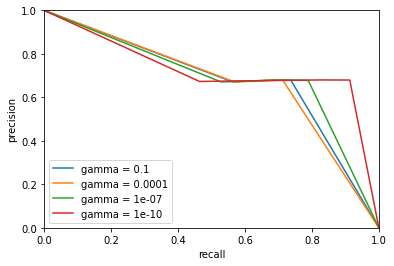

In [79]:
gammas = [0.1, 0.0001, 0.0000001, 0.0000000001]

for gamma in gammas:
    thresholds = [2.5, 3.0, 3.5, 4.0, 4.5]
    precisions = []
    recalls = []
    print('gamma', gamma, 'running')
    precisions.append(0)
    recalls.append(1)
    for threshold in thresholds:
        print('current threshold', threshold)
        preds = recommend(test, businesses_encoded, train, threshold, gamma, 'rbf', 0.2)
        precisions.append(precision_score(preds['classification'], preds['prediction']))
        recalls.append(recall_score(preds['classification'], preds['prediction']))
        
    precisions.append(1)
    recalls.append(0)
    thresholds = [0] + thresholds + [5]

    plt.plot(recalls, precisions)

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.xlabel('recall')
plt.ylabel('precision')

nu_texts = ['gamma = ' + str(gamma) for gamma in gammas]
plt.legend(nu_texts, loc = 'lower left')



# Creating an example for the slideshow

In [52]:
users[users.user_id == 'N_tmox9zMxPEYLGtrJ46pg']
reviews[reviews.user_id == 'N_tmox9zMxPEYLGtrJ46pg'].merge(businesses, on='business_id')

,user_id,business_id,review_stars,business_name,city,business_stars,attributes,categories
0,N_tmox9zMxPEYLGtrJ46pg,5VXxZIMgoKRWbNa6x9kMfw,5.0,Sweet Moses Soda Fountain & Treat Shop,Cleveland,4.5,"{'BikeParking': 'True', 'Caters': 'False', 'Wi...","{'Desserts': 1, 'Ice Cream & Frozen Yogurt': 1..."
1,N_tmox9zMxPEYLGtrJ46pg,2hDEZvaYoemStEVSi05JsQ,5.0,Flowerville,Cleveland,4.5,"{'BikeParking': 'True', 'BusinessParking': '{'...","{'Flowers & Gifts': 1, 'Shopping': 1, 'Florist..."
2,N_tmox9zMxPEYLGtrJ46pg,_6Brh4UGrsnakkBKT1H_Qw,4.0,Beerhead Bar & Eatery,Cleveland,3.5,"{'HasTV': 'True', 'WiFi': 'u'free'', 'Restaura...","{'Nightlife': 1, 'Sandwiches': 1, 'Beer Bar': ..."
3,N_tmox9zMxPEYLGtrJ46pg,IzEHkReZTds6ipOaCq2G6g,5.0,House of Blues - Music Venue,Cleveland,3.0,"{'HasTV': 'True', 'NoiseLevel': 'u'loud'', 'Re...","{'American (New)': 1, 'Bars': 1, 'American (Tr..."
4,N_tmox9zMxPEYLGtrJ46pg,RiGtSzVzc42CKjyZkDxZRA,5.0,Crop Bistro & Bar,Cleveland,4.0,"{'RestaurantsTableService': 'True', 'Restauran...","{'Event Planning & Services': 1, 'Nightlife': ..."
5,N_tmox9zMxPEYLGtrJ46pg,OA5Li3ySzhrbG_WvD_QGYA,4.0,Barrio,Cleveland,4.0,"{'BestNights': '{'monday': False, 'tuesday': T...","{'Bars': 1, 'Nightlife': 1, 'Restaurants': 1, ..."
6,N_tmox9zMxPEYLGtrJ46pg,KaweYMItlrWgoIZCOgQU9Q,4.0,The Westin Cleveland Downtown,Cleveland,3.5,"{'WiFi': 'u'paid'', 'DogsAllowed': 'True', 'Bu...","{'Hotels & Travel': 1, 'Event Planning & Servi..."
7,N_tmox9zMxPEYLGtrJ46pg,Qeie5-8-S_hLPk7_ujpajw,3.0,The Nauti Mermaid,Cleveland,3.5,"{'RestaurantsPriceRange2': '2', 'GoodForKids':...","{'Food': 1, 'Restaurants': 1, 'Breakfast & Bru..."
8,N_tmox9zMxPEYLGtrJ46pg,w4a6TuFWArSc29dB51rPNA,5.0,Bar Cento,Cleveland,3.5,"{'BikeParking': 'True', 'NoiseLevel': 'u'avera...","{'Bars': 1, 'Food': 1, 'American (New)': 1, 'G..."
9,N_tmox9zMxPEYLGtrJ46pg,4sYUOH1R2r4mCCJSjJ66ow,3.0,Academy Tavern,Cleveland,4.0,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","{'Pubs': 1, 'Bars': 1, 'Nightlife': 1, 'Americ..."


In [53]:
from sklearn.metrics import jaccard_score
from numpy import mean, array
from sklearn.utils.multiclass import type_of_target

def one_jaccard(x, definitive):
    list = []
    y_a = array(definitive.drop(columns = ['business_id'])).tolist()
    x_a = array(x.drop(['business_id'])).tolist()
    
    for y in y_a:
        list.append(jaccard_score(y, x_a))
        
    return mean(list)
    

def one_user_recommendations(user, amount, businesses, reviews, treshold, gamma, kernel, nu):
    user_reviewed = reviews[reviews.user_id == user]
    cities = set(user_reviewed.merge(businesses[['business_id', 'city']], on = 'business_id')['city'])
    businesses_in_cities = pd.DataFrame(businesses[businesses['city'].isin(cities)]['business_id'])
    
    pairs = businesses_in_cities.copy()
    pairs = pairs[~pairs['business_id'].isin(user_reviewed['business_id'])]
    pairs['user_id'] = user
    
    recommendations = recommend(pairs, businesses, reviews, treshold, gamma, kernel, nu)
    
    candidates = pd.DataFrame(recommendations[recommendations.prediction == True]['business_id'])
    candidates = candidates.merge(businesses).drop(columns = ['business_stars', 'business_name', 'city'])
    
    if len(candidates) == 0:
        return candidates
    
    random_business = random.choice(candidates['business_id'])
    definitive = pd.DataFrame(candidates[candidates.business_id == random_business])
    candidates = candidates.drop(candidates[candidates.business_id == random_business].index, axis = 0)
    
    for i in range(amount - 1):
        if len(candidates) <= 0:
            return definitive
        
        # calculate each similarity
        candidates['jaccard'] = candidates.apply(one_jaccard, args=[definitive], axis=1)
        
        # select lowest
        lowest_businesses = candidates[candidates.jaccard == min(candidates['jaccard'])]
        all_business_ids = list(lowest_businesses['business_id'])
        random_business = random.choice(all_business_ids)
        
        # apply it
        candidates = candidates.drop(columns = ['jaccard'])
        definitive = pd.concat([candidates[candidates.business_id == random_business], definitive])
        candidates = candidates.drop(candidates[candidates.business_id == random_business].index, axis = 0)
    
    return definitive
    
#one_user_recommendations(reviews.loc[2, 'user_id'], 5, businesses_encoded, reviews, 3.5, 0.000001, 'rbf', 0.2)

In [64]:
import random
examples = one_user_recommendations('N_tmox9zMxPEYLGtrJ46pg', 10, businesses_encoded, reviews, 3.5, 0.000001, 'rbf', 0.2)
examples

,business_id,Health & Medical,Medical Centers,Barbeque,Restaurants,Taiwanese,Nightlife,Bars,Sports Bars,Automotive,...,Speakeasies,DUI Law,Piano Bars,Rock Climbing,Local Fish Stores,Foundation Repair,Eatertainment,BikeParking,GoodForKids,BusinessAcceptsCreditCards
2576,cHwgtVdvZVn0AQFtWtUXXg,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
3419,x-l0yR1zcZToRZGH1hGToA,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3358,o4d2KulJmwsMPr4ao8OcFw,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3527,l-uYMTIxx-1PrgqYW0gTag,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1816,zkyXqmnuIWqFL8m4wHmTfg,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1800,DBM0lIFFkMlhfXQ0TGWQvQ,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466,-Yz15Wxp9bO21hifJaamsA,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3015,YpwmtRca3LEen-GOiuhI3g,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
820,ogX4ONTyz-cMpeTi6hvLDA,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1762,Hs2cHXGDQz3ClPg9TxBrJQ,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [65]:
pd.DataFrame(examples['business_id']).merge(businesses)

,business_id,business_name,city,business_stars,attributes,categories
0,cHwgtVdvZVn0AQFtWtUXXg,Progressive Field,Cleveland,4.5,"{'BusinessParking': '{'garage': True, 'street'...","{'Baseball Fields': 1, 'Professional Sports Te..."
1,x-l0yR1zcZToRZGH1hGToA,RTA - W117 & Madison Rapid Station,Cleveland,2.5,{},"{'Public Transportation': 1, 'Hotels & Travel'..."
2,o4d2KulJmwsMPr4ao8OcFw,Parma Animal Hospital,Cleveland,2.0,{},"{'Veterinarians': 1, 'Pets': 1}"
3,l-uYMTIxx-1PrgqYW0gTag,Barry's Barbershop,Cleveland,5.0,"{'RestaurantsPriceRange2': '2', 'ByAppointment...","{'Beauty & Spas': 1, 'Barbers': 1}"
4,zkyXqmnuIWqFL8m4wHmTfg,Chester Law Group Accident Lawyers,Cleveland,5.0,{},"{'Lawyers': 1, 'Professional Services': 1, 'Pe..."
5,DBM0lIFFkMlhfXQ0TGWQvQ,Selman & Company,Cleveland,1.5,{},"{'Life Insurance': 1, 'Insurance': 1, 'Financi..."
6,-Yz15Wxp9bO21hifJaamsA,Case Western Reserve University Faclty Dntl Pr...,Cleveland,1.5,{'ByAppointmentOnly': 'True'},"{'Health & Medical': 1, 'General Dentistry': 1..."
7,YpwmtRca3LEen-GOiuhI3g,Urban Auto Center,Cleveland,5.0,{},"{'Auto Repair': 1, 'Automotive': 1}"
8,ogX4ONTyz-cMpeTi6hvLDA,Taco Bell,Cleveland,1.0,{},"{'Restaurants': 1, 'Mexican': 1, 'Food': 1, 'F..."
9,Hs2cHXGDQz3ClPg9TxBrJQ,T-Mobile,Cleveland,1.5,{'BusinessAcceptsCreditCards': 'True'},"{'Mobile Phones': 1, 'Shopping': 1, 'Electroni..."


In [49]:
def random_recommendations(user, amount, businesses, reviews, treshold, gamma, kernel, nu):
    user_reviewed = reviews[reviews.user_id == user]
    cities = set(user_reviewed.merge(businesses[['business_id', 'city']], on = 'business_id')['city'])
    businesses_in_cities = pd.DataFrame(businesses[businesses['city'].isin(cities)]['business_id'])
    
    pairs = businesses_in_cities.copy()
    pairs = pairs[~pairs['business_id'].isin(user_reviewed['business_id'])]
    pairs['user_id'] = user
    
    recommendations = recommend(pairs, businesses, reviews, treshold, gamma, kernel, nu)
    
    candidates = pd.DataFrame(recommendations[recommendations.prediction == True]['business_id'])
    candidates = candidates.merge(businesses).drop(columns = ['business_stars', 'business_name', 'city'])
    
    if len(candidates) == 0:
        return candidates
    
    random_business = random.choice(candidates['business_id'])
    definitive = pd.DataFrame(candidates[candidates.business_id == random_business])
    candidates = candidates.drop(candidates[candidates.business_id == random_business].index, axis = 0)
    
    for i in range(amount - 1):
        if len(candidates) <= 0:
            return definitive

        all_business_ids = list(candidates['business_id'])
        random_business = random.choice(all_business_ids)
        
        # apply it
        definitive = pd.concat([candidates[candidates.business_id == random_business], definitive])
        candidates = candidates.drop(candidates[candidates.business_id == random_business].index, axis = 0)
    
    return definitive


In [75]:
def eval_jaccard(x, all_rc):
    if len(all_rc) <= 1:
        return 0.0
    
    ls = []
    y_a = array(all_rc.drop(all_rc[all_rc.business_id == x.business_id].index).drop(columns = ['business_id'])).tolist()
    x_a = array(x.drop(['business_id'])).tolist()
    
    for y in y_a:
        ls.append(jaccard_score(y, x_a))
    
    return mean(ls)

random_users = random.sample(set(users['user_id']), 50)

random_jaccards = []
oc_jaccards = []

for user in random_users:
    print('New user')
    random_rc = random_recommendations(user, 5, businesses_encoded, reviews, 3.5, 0.000001, 'rbf', 0.2)
    oc_rc = one_user_recommendations(user, 5, businesses_encoded, reviews, 3.5, 0.000001, 'rbf', 0.2)
    
    print('Recommendations ready')
    if len(random_rc) == 0:
        print('No randoms')
        random_jaccards.append(0.0)
    else:
        print('Calculating random jaccard')
        random_rc['jaccard'] = random_rc.apply(eval_jaccard, args=[random_rc], axis=1)
        random_jaccards.append(random_rc['jaccard'].mean())
        random_rc = random_rc.drop(columns = ['jaccard'])
        
    if len(oc_rc) == 0:
        print('No Actuals')
        oc_jaccards.append(0.0)
    else:
        print('Calculating actual jaccard')
        oc_rc['jaccard'] = oc_rc.apply(eval_jaccard, args=[oc_rc], axis=1)
        oc_jaccards.append(oc_rc['jaccard'].mean())
        oc_rc = oc_rc.drop(columns = ['jaccard'])

print('Random selection jaccard', mean(random_jaccards))
print('SVM selection jaccard', mean(oc_jaccards))
    
    

New user
Recommendations ready
Calculating random jaccard
0.18333333333333335
0.26590909090909093
0.20116550116550116
0.25810439560439563
0.25810439560439563
Calculating actual jaccard
0.0
0.0
0.0
0.0
0.0
New user
Recommendations ready
Calculating random jaccard
0.04583333333333334
0.04772727272727273
0.0
0.043560606060606064
0.0
Calculating actual jaccard
0.0
0.0
0.0
0.0
0.0
New user
Recommendations ready
Calculating random jaccard
0.025
0.0
0.05555555555555555
0.0
0.08055555555555555
Calculating actual jaccard
0.0
0.0
0.0
0.0
0.0
New user
Recommendations ready
Calculating random jaccard
0.1232142857142857
0.1523809523809524
0.025
0.10606060606060605
0.11856060606060606
Calculating actual jaccard
0.0
0.0
0.0
0.0
0.0
New user
Recommendations ready
Calculating random jaccard
0.125
0.08969155844155843
0.06827731092436976
0.0374331550802139
0.17410714285714285
Calculating actual jaccard
0.0
0.0
0.0
0.0
0.0
New user
Recommendations ready
Calculating random jaccard
0.09935897435897437
0.149

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recommendations ready
Calculating random jaccard
0.0625
0.0
0.0
0.0
0.0625
Calculating actual jaccard
0.0
0.0
0.0
0.0
0.0
New user
Recommendations ready
Calculating random jaccard
0.11263736263736264
0.1001082251082251
0.0
0.06468531468531469
0.1220862470862471
Calculating actual jaccard
0.0
0.0
0.0
0.0
0.0
New user
Recommendations ready
No randoms
No Actuals
New user
Recommendations ready
No randoms
No Actuals
New user
Recommendations ready
Calculating random jaccard
0.10238095238095238
0.10238095238095238
0.0
0.07777777777777778
0.1111111111111111
Calculating actual jaccard
0.0
0.0
0.0
0.0
0.0
New user
Recommendations ready
No randoms
No Actuals
New user
Recommendations ready
Calculating random jaccard
0.0
0.0
0.0
0.0
0.0
Calculating actual jaccard
0.0
0.0
0.0
0.0
0.0
New user
Recommendations ready
Calculating random jaccard
0.04423076923076923
0.0
0.048611111111111105
0.11527777777777778
0.10256410256410256
Calculating actual jaccard
0.0
0.0
0.0
0.0
0.0
New user
Recommendations read

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recommendations ready
Calculating random jaccard
0.0
0.10606060606060605
0.14556277056277056
0.11013986013986014
0.09661172161172162
Calculating actual jaccard
0.0
0.0
0.0
0.0
0.0
New user
Recommendations ready
Calculating random jaccard
0.14065934065934066
0.0
0.1
0.12142857142857143
0.019230769230769232
Calculating actual jaccard
0.0
0.0
0.0
0.0
0.0
New user
Recommendations ready
No randoms
No Actuals
New user
Recommendations ready
Calculating random jaccard
0.05397727272727273
0.1375
0.05397727272727273
0.0
0.12045454545454545
Calculating actual jaccard
0.0
0.0
0.0
0.0
0.0
New user
Recommendations ready
Calculating random jaccard
0.19166666666666665
0.11904761904761904
0.1773809523809524
0.0
0.13333333333333333
Calculating actual jaccard
0.0
0.0
0.0
0.0
0.0
New user
Recommendations ready
No randoms
No Actuals
New user
Recommendations ready
No randoms
No Actuals
New user
Recommendations ready
Calculating random jaccard
0.10902777777777778
0.19734848484848483
0.19734848484848483
0.094

In [84]:
businesses['attributes'] = businesses.attributes.fillna({})
businesses = businesses.drop(businesses[[isinstance(x, float) for x in businesses['attributes']]].index)

# Some additional plots

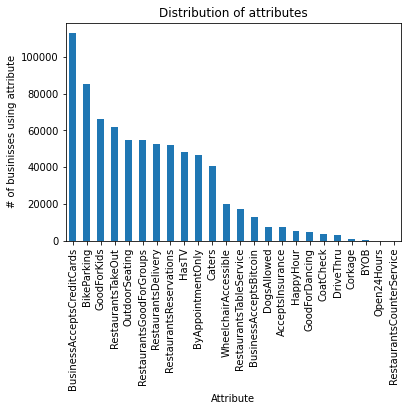

In [85]:
from numpy import nan

ba = pd.DataFrame(businesses.attributes.tolist())
ba = ba.replace({1: True, 0: True, 1.0: True, 0.0: True, 'True': True, 'False': True})
ba = ba.replace({None: False, 'None': False})
ba = ba.fillna(False)

attributes = {}

for column in ba.columns:
    if all(item == True or item == False for item in ba[column]):
        attributes[column] = ba[column].sum()

attributes = pd.Series(attributes)
attributes = attributes.sort_values(ascending=False)
plot = attributes.plot.bar(x='Attribute', y='# of businesses using attribute')
plot.set_ylabel('# of businisses using attribute')
plot.set_xlabel('Attribute')
plot.set_title('Distribution of attributes')
None

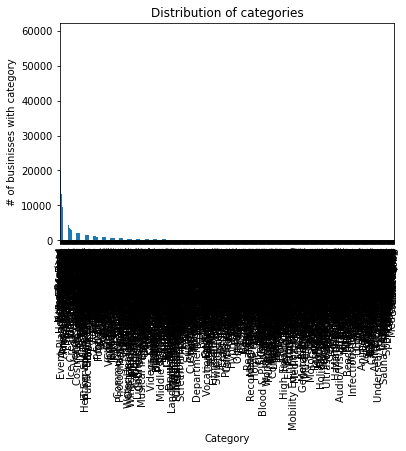

In [100]:
businesses.loc[:,'categories'] = businesses.loc[:,'categories'].apply(categories_to_list)
bc = pd.DataFrame(businesses.categories.tolist())
bc = bc.fillna(0)
bc = bc.astype(bool)


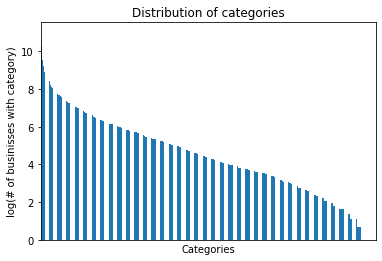

In [106]:
from numpy import log

categories = bc.sum(axis=0)
categories = log(categories)
categories = categories.sort_values(ascending=False)
plot = categories.plot.bar(x='Attribute', y='# of businesses using attribute')
plot.set_ylabel('log(# of businisses with category)')
plot.set_xlabel('Categories')
plot.set_title('Distribution of categories')
plot.axes.get_xaxis().set_ticks([])
None